<h2>Soru 1</h2>
<h3>One hot encoding modelin görmediği veriye nasıl uygulanır?</h3>

Modelin görmediği veriye, validation ya da test (farklı kaynaklarda birbirlerinin yerlerine kullanılabiliyor), eğitim sırasında sanki hiç elimizde öyle bir veri yokmuş gibi davranmak isteriz, dışlarız onu. Fakat, train setine yapılan tüm dönüşümler her ne olursa olsun, tahminlerde bulunmadan önce test setine de yapılmalıdır. Bu dönüşümler ayrı ayrı gerçekleştirilmelidir, buradaki kilit nokta budur.

Örneğin, test setinde kategorilerden biri eksikse, eğittiğimiz model yine de o dummy değişkeni bekleyeceğinden, eksik kategori için (eğitim setinde bulunabilecek) bir dummy değişken olmalıdır. Test setinin fazladan bir kategorisi varsa, bu muhtemelen bazı "diğer" kategorilerle ele alınmalıdır. Örnek bir kod bloğu aşağıda yer almaktadır.
<br>

In [49]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

train = pd.DataFrame(['A', 'B', 'A', 'C'])
test = pd.DataFrame(['B', 'A', 'D'])

full = pd.concat((train, test))

enc_false = OneHotEncoder(handle_unknown = 'ignore')
enc_false.fit(full)

print('Yanlış yaklaşılan one-hot encoding')
print('*'*50)
print(f'Traing seti :\n {enc_false.transform(train).toarray()}\n')
print(f'Test seti :\n {enc_false.transform(test).toarray()} \n\n')

enc_true = OneHotEncoder(handle_unknown = 'ignore')
enc_true.fit(train)
print('Doğru yaklaşılan one-hot encoding')
print('*'*50)
print(f'Traing seti :\n {enc_true.transform(train).toarray()} \n')
print(f'Test seti :\n {enc_true.transform(test).toarray()}')

Yanlış yaklaşılan one-hot encoding
**************************************************
Traing seti :
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]

Test seti :
 [[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]] 


Doğru yaklaşılan one-hot encoding
**************************************************
Traing seti :
 [[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]] 

Test seti :
 [[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 0.]]


<br>
Yanlış yaklaşımda D için fazladan bir sütun olduğu dikkatimizi çekiyor. Eğitim sırasında D'yi hiç bilemeyeceğiz, bu yüzden onun için bir sütun olmamalı.

Burada önemli olan bir nokta da <b>handle_unknown</b> parametresidir. Bu parametre dönüştürme sırasında bilinmeyen bir kategorik özellik varsa bir hatanın oluşturulup oluşturulmayacağı veya yoksayılacağını belirlemek içindir. Eğer parametre <b>'ignore'</b> ayarlandıysa ve dönüştürme işlemi sırasında bilinmeyen bir kategori ile karşılaşılırsa, bu özellik için elde edilen one-hot kodlanmış sütunların tümü sıfır olacaktır. Hemen bunu da bir örnek ile açıklayalım.
<br>

In [50]:
data = {'Model': ['EVO', 'GTR', 'SUPRA', 'EVO'],
        'Year' : [2008, 2015, 2001, 2010], 
        'HP' : [280, 500, 240, 300]}
jdm_train = pd.DataFrame(data)
jdm_train

,Model,Year,HP
0,EVO,2008,280
1,GTR,2015,500
2,SUPRA,2001,240
3,EVO,2010,300


<br>
Yukarıdaki veri setinin bizim train setimiz olduğunu düşünelim. <b>Model</b> kategorik bir değişken, dolayısıyla ona One-Hot Encoding uygulayabiliriz.
<br>

In [51]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
enc_fit = enc.fit(jdm_train[['Model']])
enc_fit_df = pd.DataFrame(enc_fit.fit_transform(jdm_train[['Model']]))
jdm_train = jdm_train.join(enc_fit_df)
jdm_train

,Model,Year,HP,0,1,2
0,EVO,2008,280,1.0,0.0,0.0
1,GTR,2015,500,0.0,1.0,0.0
2,SUPRA,2001,240,0.0,0.0,1.0
3,EVO,2010,300,1.0,0.0,0.0


<br>
Bu işlemden sonra bir test verisi ayarlayalım ve onu encode edelim. Yukarıdaki yaptığımız işlem sonucunda, test setimizde yer alan ve train setinde hiç olmamış olan verilere 0 atadığını görmeyi umuyoruz.
<br>

In [52]:
data_test = {'Model' : ['EVO', 'NSX', 'Silva'],
             'Year': [2010, 2000, 1999],
             'HP' : [300, 250, 200]}

jdm_test = pd.DataFrame(data_test)
jdm_test

,Model,Year,HP
0,EVO,2010,300
1,NSX,2000,250
2,Silva,1999,200


<br>
Oluşturduğumuz test verisinde 1. ve 2. indexe sahip değerlerin <b>Model</b> değişkeni train setimizde hiç yoktu. Bu setimizi train setimizle fit ettiğimiz değişken ile <b>(enc_fit)</b> encode edelim.
<br>

In [53]:
enc_fit_test = pd.DataFrame(enc_fit.transform(jdm_test[['Model']]))
jdm_test = jdm_test.join(enc_fit_test)
jdm_test

,Model,Year,HP,0,1,2
0,EVO,2010,300,1.0,0.0,0.0
1,NSX,2000,250,0.0,0.0,0.0
2,Silva,1999,200,0.0,0.0,0.0


<br>
Bilinmeyen tüm kategorileri aynı şekilde kodlandığını görmüş olduk. Bu, bilinmeyen kategorilerden yeni bir kategori tanımlandığı anlamına gelmektedir.

<br>
<h2>Soru 2</h2>
<h3>Labelencoding'de ilgili kolon için ölçeklendirme nasıl yapılır? (Verinin doğru etkisiyle sayısal olarak dönüştürülmesi)</h3>

Python'da Label Encoding işleminde, kategorik değişkeni 0 ile sınıf sayısı eksi 1 değerleri ile değiştiririz. Örneğin 5 adet kategorik değişkenimiz varsa biz bunlar için 0,1,2,3,4 değerlerini kullanırız.

Bunu daha iyi anlamak için aşağıda Hindistan'da ki Covid-19 vakalarına ait verileri inceleyelim. Verileri incelediğimizde göze direkt olarak çarpıyor ki <b>State</b> kolonu kategorik veriler içermektedir ve diğer veriler ise nümeriktir. O zaman State kolonuna Label kodlaması yapmalıyız.
<br>

<img src = 'https://lh4.googleusercontent.com/1mpZdH8WhawXeJ-7Vursq-84VSNI1wIMuZ0JeZxs1N82HMUExYmBhVHlW_QvVySeUoxX9ABLyjU5y80C8NChpez4rYvzJC14wlG7xpQI8w0vBlxLVsTww8VQoyo2f-7o4HRnQmlCMKNuvXvvGw'></img>

<br>
Aşağıdaki görseli incelersek, Label Encoding'den sonra kategorik değerlerin her birisine sayısal bir değer atandığını görürüz. Bu sayısal değerlerin neden sırasıyla 0,1,2 ya da 5,4,3 gibi atanmadığını merak ediyoruz. Cevap ise basit, atamalar alfabetik şekilde gerçekleştiriliyor, aynen bu kadar.
<br>

<img src = 'https://d1m75rqqgidzqn.cloudfront.net/wp-data/2020/08/11155757/image-37.png'></img>

<br>
<h3>Python ile Label Encoding</h3>

<ol>
    <li>Öncelikle Label Encoding işleminde kullancağımız Pandas ve NumPy kütüphanelerini import edelim.</li>
    <li>Ardından Pandas yardımıyla veri setimizi okuyacağız ve sonrasında verilerin düzgün yüklenip yüklenmediğini info() metoduyla inceleyeceğiz. State verisinin nesne tipinde olduğunu görebiliyoruz, bu adımdan sonra Label Encoding'e geçebiliriz.</li>
</ol>
<br>

In [54]:
# Pandas ve NumPy'ı import etme
import pandas as pd
import numpy as np

# Verilerimizin olduğu csv dosyasını okuyup bir dataframe'e aktarma
covid19 = pd.read_csv('/covid19_india.csv')

# Verisetimizin içeriğini inceleme
covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6 non-null      int64 
 1   State       6 non-null      object
 2   Confimed    6 non-null      int64 
 3   Deaths      6 non-null      int64 
 4   Recovered   6 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 368.0+ bytes


<br>
Label Encoding iki şekilde gerçekleştirilebilir:
<li>Scikit-learn kütüphanesinde bulunan LabelEncoder sınıfını</li>
<li>Kategori kodları</li>

<h4>1. Scikit-learn Yaklaşımı</h4>

Öncelikle ilgili sınıfı kütüphaneden import ederiz.
<br>

In [55]:
from sklearn.preprocessing import LabelEncoder

<br>
Ardından sırasıyla:
<ol>
<li>İlk olarak LabelEncoder() sınıfından bir labelencoder değişkeni/nesnesi türetilir.</li>
<li>Ardından kategorik değişkene sayısal değer atayan fit_transform yapılır ve oluşturulan sayısal değerler, yeni yaratılan 'State_N' kolonunda saklanır.</li>
<li>Unutulmaması gereken nokta, State adlı sütunu sayısal ifadeye dönüştürdük ve bu değerleri State_N sütununa aktardık. Fakat State sütunu hala veri setimizin içerisinde yer almaktadır. Veri seti ile modeli beslemeden önce State sütununun kaldırılması gerektiği unutulmamalıdır.</li>
</ol>
<br>

In [56]:
#LabelEncoder örneği oluşturma
labelencoder = LabelEncoder()

#Fit_transform ile kategorik değişkenleri sayısal değerler ile etiketleme ve bunu yeni kolonda (State_N) saklama
covid19['State_N'] = labelencoder.fit_transform(covid19['State'])

#Veri setini ekrana yazırma
covid19

,Unnamed: 0,State,Confimed,Deaths,Recovered,State_N
0,0,Maharashtra,284281,11194,158140,3
1,1,Tamil Nadu,156369,2568,107416,4
2,2,Delhi,118645,2031,116785,0
3,3,Karnataka,51422,1235,40356,2
4,4,Gujarat,45481,1046,42336,1
5,5,Uttar Pradesh,42023,1022,41956,5


<br>
<h4>2. Kategori Kodları Yaklaşımı</h4>
<ol>
<li>Öncelikle nesne tipinde olan State verilerini kategori tipine çeviririz.</li>
<li>Kategorilerin kodlarına da <b>covid19['State'].cat.codes</b> ile ulaşabiliriz.</li>
</ol>
<br>

In [57]:
covid19['State'] = covid19['State'].astype('category')
covid19.dtypes

Unnamed: 0       int64
State         category
Confimed         int64
Deaths           int64
Recovered        int64
State_N          int64
dtype: object

In [58]:
covid19['State'] = covid19['State'].cat.codes
covid19

,Unnamed: 0,State,Confimed,Deaths,Recovered,State_N
0,0,3,284281,11194,158140,3
1,1,4,156369,2568,107416,4
2,2,0,118645,2031,116785,0
3,3,2,51422,1235,40356,2
4,4,1,45481,1046,42336,1
5,5,5,42023,1022,41956,5


<br>
Bu işlemlerden sonra potansiyel olarak bir sorun ortaya çıkmaktadır. Genellikle kategorik veriler arasında herhangi bir ilişki bulunmaz fakat bizim öğrenme algoritmalarımız sayılar arasında bir ilişki kurar. Label encoding işlemi sonrasında ise algoritmanın ilişki kurabileceği türden bir etiketleme yaptığını görebiliyoruz. Her bir state için farklı sayısal değerler üretti fakat bu değerler birbirleriyle kıyaslanabilir, dolayısıyla algoritma da kıyaslayacaktır fakat bu etiket değerlerinin State'lere ait olduğunu, kıyaslanamayacağını biz biliyoruz, algoritma bilmiyor. Label Encoding'de ki genel sorun bu.
<br>

<br>
<h2>Soru 3</h2>
<h3>Imbalance datasette train test split yaparken neleri göz önünde bulundurmalıyız?</h3>

Yüzde 90'ı A, yüzde 10'u B etiketi gibi olan dengesiz veri setlerinde train/test splitting adımına dikkat etmemiz gerekmektedir. Dikkat edeceğimiz noktalar:
<li>Elimizdeki setleri, test setinin tüm sette aynı oranda sahip olacak şekilde bölmemiz gerekmektedir. Aksi takdirde, tamamen rastgele olacak şekilde test setimiz tamamen A'lardan oluşabilir ve bu durumda modelimiz yalnızca A'ları tahmin edebilir. Doğru oranları düzenlediğimiz takdirde modelimiz B'leri de tahmin edebilir. </li>
<li>Eğitim adil olabilmesi için azınlıkta olan sınıfa daha <b>fazla örnekleme (oversampling)</b>, ya da fazlalık olan sınıfa <b>eksik örnekleme (undersampling)</b> yapılabilir.</li>
<li>Sadece <b>accuracy</b> değerini değil, aynı zamanda <b>precision</b> ve <b>recall</b> değerlerini de ölçmemiz, bunlara dikkat etmemiz gerekmektedir. Berbat bir model kurduk diyelim ve bu model tüm örneklerin A olduğunu söylüyor. Bu, modelin %90 doğru olduğu anlamına gelmiyor, elindeki verilerin yüzde 90'nı A olduğu için zıt görüş hakkında bilgisi olmuyor. Dolayısıyla ne gelirse gelsin yüzde 90 ihtimalle A olmuş oluyor model için. Bu sebeple elimizde olan diğer metrikler fazlasıyla önem arzediyor ve onları dikkate almamız gerekiyor.</li>
<br>

<br>
<h2>Soru 4</h2>
<h3> Validation dataseti (modelin görmediği) nasıl oluşturulur ve nasıl predict etmeye hazır hale getirilir?</h3>

Modeli oluşturmak veya ince ayarlar yapmak için modelin kullanılmayan örnekler üzerinde değerlendirilmesi ideal olandır ve bu şekilde tarafsız bir yöntem sağlanmış olur. Validation setindeki bilgilerin, tüm model ayarlamaları tamamlanana kadar saklanması yani, validation setinin kitlenmesi gerekmektedir. Validation seti, en başta hiçbir işlem görmeden önce ayrılmalıdır, daha sonrasında model kurma aşamasında gereken tüm testler, test seti üzerinde gerçekleştirilir. Model kurma aşaması tamamlandıktan sonra son olarak validation seti ile modelin gerçek hayattaki potansiyeli ölçülür. Bu ölçümü yapabilmek için validation setine, train setinden ayrı olarak yine train setine yapılan tüm işlemlerin yapılması gerekmektedir. Burada dikkat edilecek husus ise, train setine yapılan encoding işlemleri sonucunda çıkan veriler ile validation setinde gerçekleştiren encoding işlemi sonucunda çıkan verilerin birbirleriyle uyuşması. Bunun için gerekli yöntemler de gerçekleştirildiği takdirde validation setimiz predict etmeye hazır hale gelmiş olacaktır.
<br>

<br>
<h2>Soru 5</h2>
<h3>'predict_proba' Metoduyla Oran Nasıl Hesaplanır ve Treshold Nasıl Değiştirilir?</h3>

Sınıflandırma, kümeleme, regresyon gibi yöntemlerin kullanıldığı çalışmalarda tahmin edilen etiket bilgisi <b>predict</b> fonksiyonu ile hesaplanırken, sınıflandırma problemlerinde gözlemlerin sınıflara ait olma olasılıkları ise <b>predict_proba</b> fonksiyonu ile hesaplanır.
<br>

In [ ]:
# dt, DecisionTreeClassifier sınıfından türetilen değişken
y_pred_proba = dt.predict_proba(X_test)

<br>
Yukarıda yer alan örnekteki gibi çalışan predict_proba ile etiketleri değil olasılıkları öğreniriz, çıktıda yer alan veriler de her etikete ait olma yüzdesini içerir. 

Kullandığımız predict_proba fonksiyonu ile thresold'a istediğimiz bir değeri nasıl verebiliriz onu inceleyelim.
<br>

In [ ]:
#Threshold değerini değiştirme
y_pred_new_threshold = (model.predict_proba() >= mythreshold).astype(int)

<br>
Yukarıdaki yer alan kod parçacığını incelediğimizde, predict_proba'nın çıktıları ile ufak bir threshold kontrolü yaparak '>=' istediğimiz threshold değerlerini elde ediyoruz. Fakat burada eksik olan bir şey var, predict_proba fonksiyonunun çıktısı (n_data_rows, n_classes) şeklinde bir dizidir. Eğer yukarıdaki gibi çalıştırırsak hedef sınıfa uygulamış olmayız, o yüzden hedef sınıfı belirtmemiz gerekmektedir (genellikle 1).
<br>

In [ ]:
#Threshold değerini değiştirme
y_pred_new_threshold = (model.predict_proba()[:,1] >= mythreshold).astype(int)

<br>
<h2>Soru 6</h2>
<h3 align='justify'>Fraud case'i üzerinde train&test&validation split, encoding, scaling,modelleme çalışmaları Python'da yapılarak, modelin görmediği dataset üzerinde başarılı sonuç alacak bir model örneği yapılmalı.</h3>

In [15]:
import pandas as pd
import numpy as np
import datetime as dt

#for quick viz
import seaborn as sns

#ml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import random

In [16]:
df = pd.read_csv('/var/auto_insurance_csv.csv')
df = df.drop(['_c39','Unnamed: 0'], axis = 1)
df['umbrella_limit'] = df.umbrella_limit.fillna("9999")
df['police_report_available'] = df.police_report_available.fillna("MISSING")
df['policy_csl'] = df.policy_csl.fillna("MISSING")
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['claim_day_of_policy'] = (df.incident_date -  df.policy_bind_date).dt.days
df['location_check'] = np.nan
df['location_check'] = np.where(df['policy_state'] == df['incident_state'], True, False)
df['fraud_reported'] = df['fraud_reported'].str.replace('Y', '1')
df['fraud_reported'] = df['fraud_reported'].str.replace('N', '0')
df['fraud_reported'] = df['fraud_reported'].astype(int)
df['umbrella_limit'] = df.umbrella_limit.astype(str)
umbrealla = df['umbrella_limit'].unique()
for umb in umbrealla:
  if (umb != '0.0') & (umb != '9999'):
    df['umbrella_limit'] = df['umbrella_limit'].str.replace(umb, 'other')
    
hobbies = df['insured_hobbies'].unique()
for hobby in hobbies:
  if (hobby != 'chess') & (hobby != 'cross-fit'):
    df['insured_hobbies'] = df['insured_hobbies'].str.replace(hobby, 'other')

df['age'] = df.age.fillna(9999)
bin_labels = ['15-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65','9999']
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 9999]

df['age_group'] = pd.cut(df['age'], bins = bins, labels = bin_labels, include_lowest = True)
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
bin_labels = ['0-50','51-100','101-150','151-200','201-250','251-300','301-350','351-400','401-450','451-500']

df['months_as_customer_groups'] = pd.cut(df['months_as_customer'], bins = 10, labels = bin_labels, include_lowest= True)
bins = list(np.linspace(0,2500, 6, dtype = int))
bin_labels = ['very low', 'low', 'medium', 'high', 'very high']

df['policy_annual_premium_groups'] = pd.cut(df['policy_annual_premium'], bins = bins, labels=bin_labels)
bins = list(np.linspace(0,2000, 5, dtype = int))
bin_labels = ['0-500', '501-1000', '1001-1500', '1501-2000']

df['policy_deductable_group'] = pd.cut(df['policy_deductable'], bins = bins, labels = bin_labels)

df = df.drop(['age', 'months_as_customer', 'policy_deductable', 'policy_annual_premium'], axis = 1)
required_columns = ['incident_date','policy_state', 'policy_csl', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount','auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'claim_day_of_policy',
       'location_check', 'age_group', 'months_as_customer_groups',
       'policy_annual_premium_groups', 'policy_deductable_group']
df1 = df[required_columns]

In [18]:
df1.incident_date.count()

1000

In [19]:
# Validation ve model setlerinin belirlenmesi
df1_val = df1.sort_values(by='incident_date',ascending=False).head(200)
df1_model = df1.sort_values(by='incident_date',ascending=False).tail(800)

# Gereksiz iki kolonun temizlenmesi
df1_val = df1_val.drop(["incident_date"],axis=1)
df1_model = df1_model.drop(["incident_date"],axis=1)
df1_val = df1_val.drop(["incident_location"],axis=1)
df1_model = df1_model.drop(["incident_location"],axis=1)

# Kategorik kolonların belirlenmesi
cat_cols = ['age_group', 'months_as_customer_groups', 'policy_annual_premium_groups','location_check','policy_deductable_group']
for col in cat_cols:
  df1_model[col] = df1_model[col].astype('object')

#Encode edilecek olan kolonların oluşturulan listeye kaydedilmesi
columns_to_encode = []
for col in df1_model.columns:
  if df1_model[col].dtype == 'object':
    columns_to_encode.append(col)

#Kategorik değişkenler üzerinde dummy dönüşümü gerçekleştirimi
df1_model_dummy = pd.get_dummies(df1_model, columns = columns_to_encode)
columns_dummy = []
for i in df1_model_dummy.columns:
    columns_dummy.append(i)

df1_dummy = df1_model_dummy.iloc[:,:11]
clmn_dummy= columns_dummy[11:]

<br>
Yukarıda model kuracağımız set ile validation setini ilk olarak ayırıyoruz. Validation setimizi kitleyerek, model için hazırladığımız veriler üzerinden kategorik verileri tespit ediyoruz, bu verilere sonrasında one-hot dönüşümü yapılacak.
<br>

In [20]:
#Bütün kategorik verilere one-hot dönüşümü uygulanması
from sklearn.preprocessing import OneHotEncoder

#Model setine fit ve transform işlemlerinin uygulanması
ohe = OneHotEncoder(handle_unknown='ignore')
enc_fit = ohe.fit(df1_model[columns_to_encode])
enc_fit_arr=enc_fit.fit_transform(df1_model[columns_to_encode]).toarray()

# Birleştirme sırasında veri kaybı yaşanmaması için index resetleme
df1_dummy.reset_index(drop=True, inplace=True)

# Encode sonucu oluşan veriler ile orjinal verilerin birleştirilmesi
enc_fit_df=pd.DataFrame(enc_fit_arr, columns=clmn_dummy)
df1_model_ohe = pd.concat([df1_dummy,enc_fit_df], axis=1)
df1_model_ohe.head(14)

,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,auto_year,fraud_reported,claim_day_of_policy,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,policy_csl_MISSING,umbrella_limit_0.0,umbrella_limit_9999,umbrella_limit_other,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,...,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,location_check_False,location_check_True,age_group_15-20,age_group_21-25,age_group_26-30,age_group_31-35,age_group_36-40,age_group_41-45,age_group_46-50,age_group_51-55,age_group_56-60,age_group_61-65,age_group_9999,months_as_customer_groups_0-50,months_as_customer_groups_101-150,months_as_customer_groups_151-200,months_as_customer_groups_201-250,months_as_customer_groups_251-300,months_as_customer_groups_301-350,months_as_customer_groups_351-400,months_as_customer_groups_401-450,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low,policy_deductable_group_0-500,policy_deductable_group_1501-2000,policy_deductable_group_501-1000
0,446755,0,-46200,9,1,2,3,6560,2003,0,4427,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,475891,0,0,6,1,1,3,6000,2000,0,8921,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,603948,47200,-69700,12,3,2,3,36300,2013,0,205,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,462525,26500,0,23,3,0,3,55200,1998,1,1980,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,471366,0,-31700,0,1,2,1,48290,1995,0,7692,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,604328,0,-47400,7,1,0,1,3190,2015,0,8231,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,438546,0,-54600,13,1,1,2,72120,2009,0,3483,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,

<br>Yukarıda model setine one-hot dönüşümü uygulandı, parametre olarak da handle_unknown = 'ignore' verildi. Böylelikle validation setindeki veriler ile uyuşmazlık yaşandığı takdirde çıkacak olan sorunun üstesinden gelmiş olduk.<br>

In [21]:
#Kategorik değişken varlığının kontorlü
cols = df1_model_ohe.columns
num_cols = df1_model_ohe._get_numeric_data().columns
list(set(cols) - set(num_cols))

[]

In [22]:
#Feature ve target değişkenlerinin belirlenmesi
target = 'fraud_reported'

X = df1_model_ohe.drop(columns=target, axis=1)
y = df1_model_ohe[target]

#Feature'lara scale işlemi uygulanması
sc = StandardScaler()
X = sc.fit_transform(X)

<br/>Yukarıda öncelikle elimizde kategorik değişken kalıp kalmadığı kontrol edildi. Bütün değişkenlerin nümerik olduğu tespit edildikten sonra feature ve targerları belirlendi. Sonrasında elimizdeki verileri ölçekleyerek model kurmaya hazır hale getirildi.
Bundan sonraki adım ise hedefimizdeki değişkenleri dengeli hale getirmek olacak. Elimizde az sayıda bulunan 1 değişkenini oversampling ile arttırarak 0 ile aynı seviyeye getireceğiz.
<br/>

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


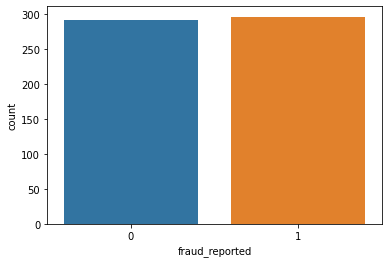

In [23]:
#Train/test splitting ve oversampling işlemleri
oversample = SMOTE(random_state=9)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 42)
X_over, y_over = oversample.fit_resample(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.3, random_state = 1)

chck = pd.DataFrame()
chck['fraud_reported'] = y_train

sns.countplot(chck['fraud_reported'])

<br>
Target değişkenlerimizin de dengeli hale geldiğini yukarıdaki grafikten anlayabiliyoruz. Artık elimizdeki test verisini kullanarak, Random Forest ile tahminleme yapıp skor üretebiliriz.
<br>

93.25396825396825

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       128
           1       0.92      0.94      0.93       124

    accuracy                           0.93       252
   macro avg       0.93      0.93      0.93       252
weighted avg       0.93      0.93      0.93       252



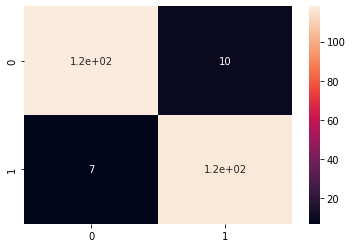

In [24]:
# RFC tanımlanıp tahmin yapılıp skor üretilmesi
rfc = RandomForestClassifier(random_state = 1)
rfc.fit(X_train, y_train)
preds = rfc.predict(X_test)
score = rfc.score(X_test, y_test)

print(score*100)
print()
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
sns
sns.heatmap(cm, annot=True)

<br>
Model setimize encode, scale ve smote işlemlerini uyguladıktan sonra test için ayırdığımız veri seti ile basit bir deneme yaptığımızda 0 ve 1 için güzel tahmin skorları üretebildik. Hyperparameter optimizasyonu ile neler değiştirebileceğimizi aşağıda göreceğiz.
<br>

In [25]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 1000, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

{'n_estimators': [300, 650, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 17, 30, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [26]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

91.93548387096774

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       124
           1       0.91      0.94      0.92       124

    accuracy                           0.92       248
   macro avg       0.92      0.92      0.92       248
weighted avg       0.92      0.92      0.92       248



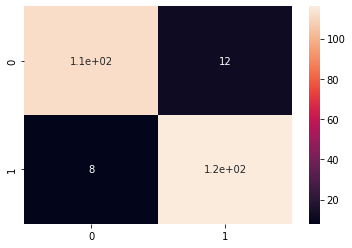

In [43]:
# Bulunan best paramsların rfc'ye uygulanması ve tekrardan fit ve tahmin işlemlerinin gerçekleştirilip skor üretilmesi
rf2 = RandomForestClassifier(n_estimators=300,min_samples_split=2,min_samples_leaf=2,max_features='auto'
                            ,max_depth=5,bootstrap='False')
rf2.fit(X_train, y_train)

preds = rf2.predict(X_test)

score = rf2.score(X_test, y_test)
print(score*100)
print()
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
sns
sns.heatmap(cm, annot=True)

<br>
Çeşitli parametre değişkenleri denenerek bir çok kez eğitim gerçekleştirildi ve elde edilen skorların bir önceki aşamadaki ile aynı olduğu tespit edildi. Elimizde alabileceğimiz maksimum verim üreten parametrelerle devam edeceğiz. Bundan sonraki aşama ise modelimizi gerçek yaşam simülasyonuna sokmak, evet, validation seti ile modelimizin ne kadar faydalı çalıştığını tespit etmeye çalışacağız. Fakat öncesinde validation setimizi modelimize uygun hale getirmemiz lazım, yani modele ne işlem uygulandıysa aynısını validation setine de uygulamamız gerekmektedir. Bunlar da encode ve scale işlemleri. 
<br>

In [44]:
# KAtegorik verilerin tespiti
categorical_cols = ['age_group', 'months_as_customer_groups', 'policy_annual_premium_groups','location_check','policy_deductable_group']
for col in categorical_cols:
  df1_val[col] = df1_val[col].astype('object')

# Encode edilecek olan kolonların belirlenmesi
columns_to_encode = []
for col in df1_val.columns:
  if df1_val[col].dtype == 'object':
    columns_to_encode.append(col)

# Daha önce oluşturulan enc_fit ile validation setinin de encode edilmesi
df1_val_ohe = pd.DataFrame(enc_fit.transform(df1_val[columns_to_encode]).toarray(), columns=clmn_dummy)
columns_num = columns_dummy[:11]
df1_val_numerical = pd.DataFrame(df1_val, columns=columns_num)
df1_val_numerical.reset_index(drop=True, inplace=True)
df1_val_ohe = pd.concat([df1_val_numerical, df1_val_ohe], axis=1)

# Feature ve targetlerın belirlenmesi
target = 'fraud_reported'
X_val = df1_val_ohe.drop(columns=target, axis=1)
y_val = df1_val_ohe[target]

# Feature verilerinin ölçeklendirilmesi
X_val = sc.fit_transform(X_val)

27.500000000000004

              precision    recall  f1-score   support

           0       0.95      0.12      0.21       163
           1       0.20      0.97      0.33        37

    accuracy                           0.28       200
   macro avg       0.57      0.54      0.27       200
weighted avg       0.81      0.28      0.23       200



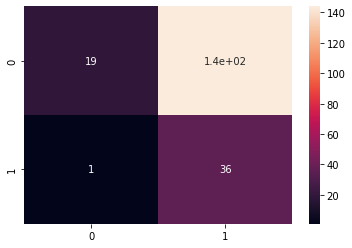

In [45]:
# Train seti ile validation setinin tahminlemesi
preds = rf2.predict(X_val)
score = rf2.score(X_val, y_val)

print(score*100)
print()
print(classification_report(y_val, preds))

cm = confusion_matrix(y_val, preds)
sns
sns.heatmap(cm, annot=True)

<br>
Validasyon verilerine yukarıda bahsedilen işlemler uygulandıktan sonra modelimizin gerçek hayatta nasıl bir performans sergilediğini yukarıda görmekteyiz. Daha öncesinde yüzde 91 olan 0 tahminleme skoru yüzde 12 değerine kadar gerilemiş. Gerçek hayatta sıfırları tahminlemede oldukça kötü bir performans sergilediğini görüyoruz. Peki burda neyi yanlış yaptık ya da neyi değiştirebiliriz? Belki kullandığımız algoritma ya da yanlış verilerin gruplanması... vb. bir çok etken buna sebep olabilir. En basit yoldan bir şeyi değiştirebilir, o da threshold değeri. Bu değer ile oynayarak nasıl bir çıktı alacağımızı kontrol edelim.
<br>

27.500000000000004

              precision    recall  f1-score   support

           0       0.94      0.72      0.82       163
           1       0.40      0.81      0.54        37

    accuracy                           0.74       200
   macro avg       0.67      0.77      0.68       200
weighted avg       0.84      0.74      0.77       200



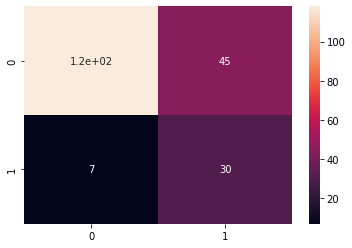

In [47]:
# Threhold değerine müdahelede bulunulması ve sonrasında tekrardan skor üretilmesi
preds = (rf2.predict_proba(X_val)[:,1] >= 0.62).astype(int)
score = rf2.score(X_val, y_val)
print(score*100)
print()
print(classification_report(y_val, preds))

cm = confusion_matrix(y_val, preds)
sns
sns.heatmap(cm, annot=True)

<br>
Threshold değerimiz ile oynadığımızda özellikle 0 tahminlemede ciddi bir ilerleme kaydettiğimizi görüyoruz fakat 1 tahminlemede de ufak bir kaybımız var. Modelin bu haliyle bir öncekine oranla daha iyi olduğunu söyleyebiliriz fakat hala mükemmel değil. Peki mükemmel olması için başka ne yapılabilir? Train/test splitte çeşitli yöntemler uygulanabilir, farklı algoritmalar denenebilir ya da encoding yöntemleri değiştirilebilir. 
Öncelikle farklı algoritmalar ile farklı sonuçlar üretilebileceğimiz bir gerçek fakat bizim burdaki amacımız farklı algoritmaları denemekten ziyade gerçekleştireceğimiz diğer işlemler ile aynı algoritma üzerinde daha fazla skor üretebilmek. 
Genel olarak veri setine komple label encoding yapmak pek doğru gelmemektedir, sebebi ise label encodingin çalışma mantığı. Belirli kategoriler belirleyip onlara ayrıca uygulamak mantıklı olabilir fakat tek seferde bütün kategorik değişkenlere uygulanabilecek en mantıklı yöntem one-hot encoding. Bu seçeneği de elediğimize göre, smote'da ki state adımı ve train test split parametrelerinde değişikliklerle skorumuzu yükseltmeyi deneyelim.
<br>

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


90.7258064516129

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       124
           1       0.91      0.90      0.91       124

    accuracy                           0.91       248
   macro avg       0.91      0.91      0.91       248
weighted avg       0.91      0.91      0.91       248



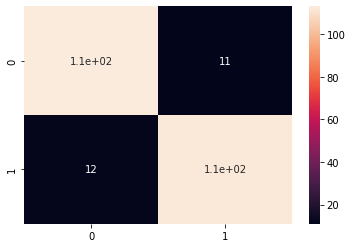

In [31]:
oversample = SMOTE(random_state=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3,  random_state = 42)
X_over, y_over = oversample.fit_resample(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, stratify=y_over, test_size = 0.3, random_state = 1)

chck = pd.DataFrame()
chck['fraud_reported'] = y_train


rfc = RandomForestClassifier(random_state = 1)
rfc.fit(X_train, y_train)

preds = rfc.predict(X_test)

score = rfc.score(X_test, y_test)
print(score*100)
print()
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
sns
sns.heatmap(cm, annot=True)

In [32]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 15)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 9)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

{'n_estimators': [100, 164, 228, 292, 357, 421, 485, 550, 614, 678, 742, 807, 871, 935, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 8, 11, 14, 17, 20, 23, 26, 30, None], 'min_samples_split': [2, 5, 10, 15], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [33]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 26,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 807}

90.7258064516129

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       124
           1       0.90      0.91      0.91       124

    accuracy                           0.91       248
   macro avg       0.91      0.91      0.91       248
weighted avg       0.91      0.91      0.91       248



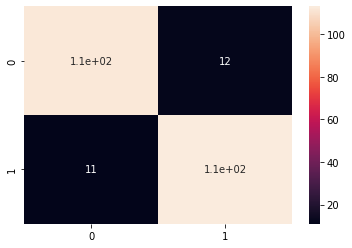

In [39]:
rf2 = RandomForestClassifier(n_estimators=807,min_samples_split=2,min_samples_leaf=1,max_features='auto'
                            ,max_depth=26,bootstrap='True')
rf2.fit(X_train, y_train)

preds = rf2.predict(X_test)

score = rf2.score(X_test, y_test)
print(score*100)
print()
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
sns
sns.heatmap(cm, annot=True)

49.5

              precision    recall  f1-score   support

           0       0.94      0.40      0.57       163
           1       0.25      0.89      0.40        37

    accuracy                           0.49       200
   macro avg       0.60      0.65      0.48       200
weighted avg       0.82      0.49      0.53       200



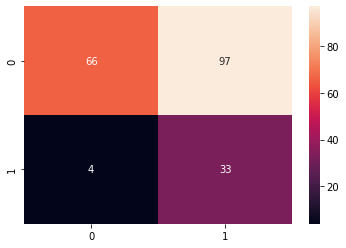

In [40]:
categorical_cols = ['age_group', 'months_as_customer_groups', 'policy_annual_premium_groups','location_check','policy_deductable_group']
for col in categorical_cols:
  df1_val[col] = df1_val[col].astype('object')

columns_to_encode = []
for col in df1_val.columns:
  if df1_val[col].dtype == 'object':
    columns_to_encode.append(col)

df1_val_ohe = pd.DataFrame(enc_fit.transform(df1_val[columns_to_encode]).toarray(), columns=clmn_dummy)
columns_num = columns_dummy[:11]
df1_val_numerical = pd.DataFrame(df1_val, columns=columns_num)
df1_val_numerical.reset_index(drop=True, inplace=True)
df1_val_ohe = pd.concat([df1_val_numerical, df1_val_ohe], axis=1)

target = 'fraud_reported'

X_val = df1_val_ohe.drop(columns=target, axis=1)
y_val = df1_val_ohe[target]

X_val = sc.fit_transform(X_val)

preds = rf2.predict(X_val)
score = rf2.score(X_val, y_val)
print(score*100)
print()
print(classification_report(y_val, preds))

cm = confusion_matrix(y_val, preds)
sns
sns.heatmap(cm, annot=True)

27.500000000000004

              precision    recall  f1-score   support

           0       0.94      0.72      0.82       163
           1       0.40      0.81      0.54        37

    accuracy                           0.74       200
   macro avg       0.67      0.77      0.68       200
weighted avg       0.84      0.74      0.77       200



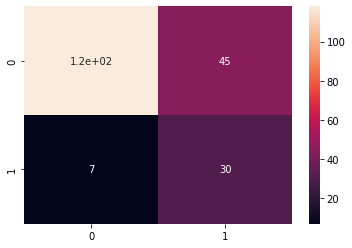

In [48]:
preds = (rf2.predict_proba(X_val)[:,1] >= 0.62).astype(int)
score = rf2.score(X_val, y_val)
print(score*100)
print()
print(classification_report(y_val, preds))

cm = confusion_matrix(y_val, preds)
sns
sns.heatmap(cm, annot=True)

<br>
Train/test split metoduna eklediğimiz stratify parametresinin ve smote işleminde gerçekleştirilen randome state sayısının değiştirilmesi sonucunda elde ettiğimiz skor yukarıda yer almaktadır. Bu skor bir önceki ile birebir aynıdır, bu da demek oluyor ki bu işlemler de ekstradan bir fayda sağlamadı. Fakat skorlarımız genel olarak daha iyi durumdalar.
Peki tüm bu işlemlerden çıkarılacak olan sonuç nedir? Modelin gerçek hayatta göstermiş olduğu performans neye bağlıdır? Aslında tüm bunların cevabını bir nebze bu çalışmada vermiş olduk. Öncelikle önemli olan ilk şey, validation setinin (bazı kaynaklarda test olarak geçer), modelin görmediği veri, ilk başta herhangi bir işleme uğramadan tüm eğitim sonuna kadar saklanması gerekmektedir. Daha sonrasında eğitecek olduğumuz veri setini rastgeleden ziyade daha dengeli parçalamılıyız, böylelikle tek bir değer üzerine yoğunlaşmanın önüne geçmiş oluruz. Encoding yöntemlerini ilgili kolonların türüne ve anlamlarına göre uygulamalıyız ve burdaki en önemli nokta, saklamış olduğumuz validation setinde olmayan ya da orda olup eğitim setinde olmayan verileri dikkate alarak encoding işlemi gerçekleştirmeliyiz. Aksi takdirde validation ile tahminlemede hiç görmediği bir veri ile karşılaşabilir ve modelin kafasını karıştırabiliriz. Bunlar dışında hyperparameter değerlerinin önemi de fazladır. Tabii en önemli noktalardan birisi de hangi yöntemi kullanacağımız. RFC mi SVM mi vb. bir çok sınıflandırma algoritması bulunmaktadır. Bunları modelimiz üzerinde test ederek karşılaştırabilir ve hangisin daha uygun olduğunu belirleyebiliriz. Bu çalışmada algoritma denemekten ziyade diğer parametreler üzerinde iyileştirmeler yapılması amaçlanmıştır.

